In [42]:
import datetime
import random
import json
import numpy as np 
#import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
""" class FakeHeartRateMonitor():
    def __init__(self):
        self.prev_hr = 60
        self.time_now = datetime.datetime.now()

    def get_heart_rate(self):
        change = random.randint(-2, 2)
        if random.random() < 0.1:  
            change += random.randint(-70, 70)

        new_rate = min(max(self.prev_hr + change, 40), 160)
        
        self.time_now = self.time_now + datetime.timedelta(seconds=1)
        return [new_rate, datetime.datetime.timestamp(self.time_now)]
    
monitor = FakeHeartRateMonitor() """


In [78]:
with open('HeatSense_data.json', 'r') as openfile:
    data = json.load(openfile)
    
print(data['stores'][0]['values'])

hrs = data['stores'][0]['values']



[{'timestamp': 1705501448300, 'hr': 156}, {'timestamp': 1705501448685, 'hr': 158}, {'timestamp': 1705501449513, 'hr': 72}, {'timestamp': 1705501449717, 'temp': 33.5}, {'timestamp': 1705501450392, 'hr': 71}, {'timestamp': 1705501451228, 'hr': 71}, {'timestamp': 1705501451610, 'temp': 33.5}, {'timestamp': 1705501452103, 'hr': 70}, {'timestamp': 1705501452969, 'hr': 69}, {'timestamp': 1705501453612, 'temp': 33.5}, {'timestamp': 1705501453854, 'hr': 69}, {'timestamp': 1705501454686, 'hr': 70}, {'timestamp': 1705501455508, 'hr': 71}, {'timestamp': 1705501455605, 'temp': 33.5}, {'timestamp': 1705501456291, 'hr': 72}, {'timestamp': 1705501457068, 'hr': 74}, {'timestamp': 1705501457610, 'temp': 33.5}, {'timestamp': 1705501457849, 'hr': 75}, {'timestamp': 1705501458584, 'hr': 76}, {'timestamp': 1705501459267, 'hr': 77}, {'timestamp': 1705501459607, 'temp': 33.5}, {'timestamp': 1705501459945, 'hr': 78}, {'timestamp': 1705501460579, 'hr': 80}, {'timestamp': 1705501461259, 'hr': 82}, {'timestamp':

In [79]:
heartlist = []
templist = []

for l in hrs:
    if 'temp' in l.keys():
        templist.append(l)
    elif 'hr' in l.keys():
        heartlist.append(l)
    


In [80]:
heartlist

[{'timestamp': 1705501448300, 'hr': 156},
 {'timestamp': 1705501448685, 'hr': 158},
 {'timestamp': 1705501449513, 'hr': 72},
 {'timestamp': 1705501450392, 'hr': 71},
 {'timestamp': 1705501451228, 'hr': 71},
 {'timestamp': 1705501452103, 'hr': 70},
 {'timestamp': 1705501452969, 'hr': 69},
 {'timestamp': 1705501453854, 'hr': 69},
 {'timestamp': 1705501454686, 'hr': 70},
 {'timestamp': 1705501455508, 'hr': 71},
 {'timestamp': 1705501456291, 'hr': 72},
 {'timestamp': 1705501457068, 'hr': 74},
 {'timestamp': 1705501457849, 'hr': 75},
 {'timestamp': 1705501458584, 'hr': 76},
 {'timestamp': 1705501459267, 'hr': 77},
 {'timestamp': 1705501459945, 'hr': 78},
 {'timestamp': 1705501460579, 'hr': 80},
 {'timestamp': 1705501461259, 'hr': 82},
 {'timestamp': 1705501461947, 'hr': 83},
 {'timestamp': 1705501462626, 'hr': 85},
 {'timestamp': 1705501463362, 'hr': 84},
 {'timestamp': 1705501464141, 'hr': 84},
 {'timestamp': 1705501464921, 'hr': 83},
 {'timestamp': 1705501465744, 'hr': 81},
 {'timestamp':

In [81]:
hrs = templist

timstmps, heart_rates = np.expand_dims([x['timestamp'] for x in hrs], 1), np.expand_dims([x['temp'] for x in hrs], 1)

In [82]:
timstmps.shape

(68, 1)

In [83]:
hours = 12
heart_rate_data = np.concatenate([heart_rates, timstmps], 1)


print(heart_rate_data.shape)
heart_rate_data

(68, 2)


array([[3.35000000e+01, 1.70550145e+12],
       [3.35000000e+01, 1.70550145e+12],
       [3.35000000e+01, 1.70550145e+12],
       [3.35000000e+01, 1.70550146e+12],
       [3.35000000e+01, 1.70550146e+12],
       [3.35000000e+01, 1.70550146e+12],
       [3.35000000e+01, 1.70550146e+12],
       [3.35000000e+01, 1.70550146e+12],
       [3.35000000e+01, 1.70550147e+12],
       [3.35000000e+01, 1.70550147e+12],
       [3.35000000e+01, 1.70550147e+12],
       [3.35000000e+01, 1.70550147e+12],
       [3.35000000e+01, 1.70550147e+12],
       [3.35000000e+01, 1.70550148e+12],
       [3.35000000e+01, 1.70550148e+12],
       [3.35000000e+01, 1.70550148e+12],
       [3.35000000e+01, 1.70550148e+12],
       [3.35000000e+01, 1.70550148e+12],
       [3.35000000e+01, 1.70550149e+12],
       [3.35000000e+01, 1.70550149e+12],
       [3.35000000e+01, 1.70550149e+12],
       [3.35000000e+01, 1.70550149e+12],
       [3.35000000e+01, 1.70550149e+12],
       [3.35000000e+01, 1.70550150e+12],
       [3.350000

In [76]:
window = 60 #seconds

average_data = []
for i in range(0, len(heart_rate_data) - window, window):
    window_data = heart_rate_data[i : i+window, :]
    avg_hr = np.mean(window_data[:, 0])
    average_data.append([round(avg_hr, 1), window_data[:, 1][0]])

heart_rate_data = average_data

heart_rate_data

[]

## Line Plot

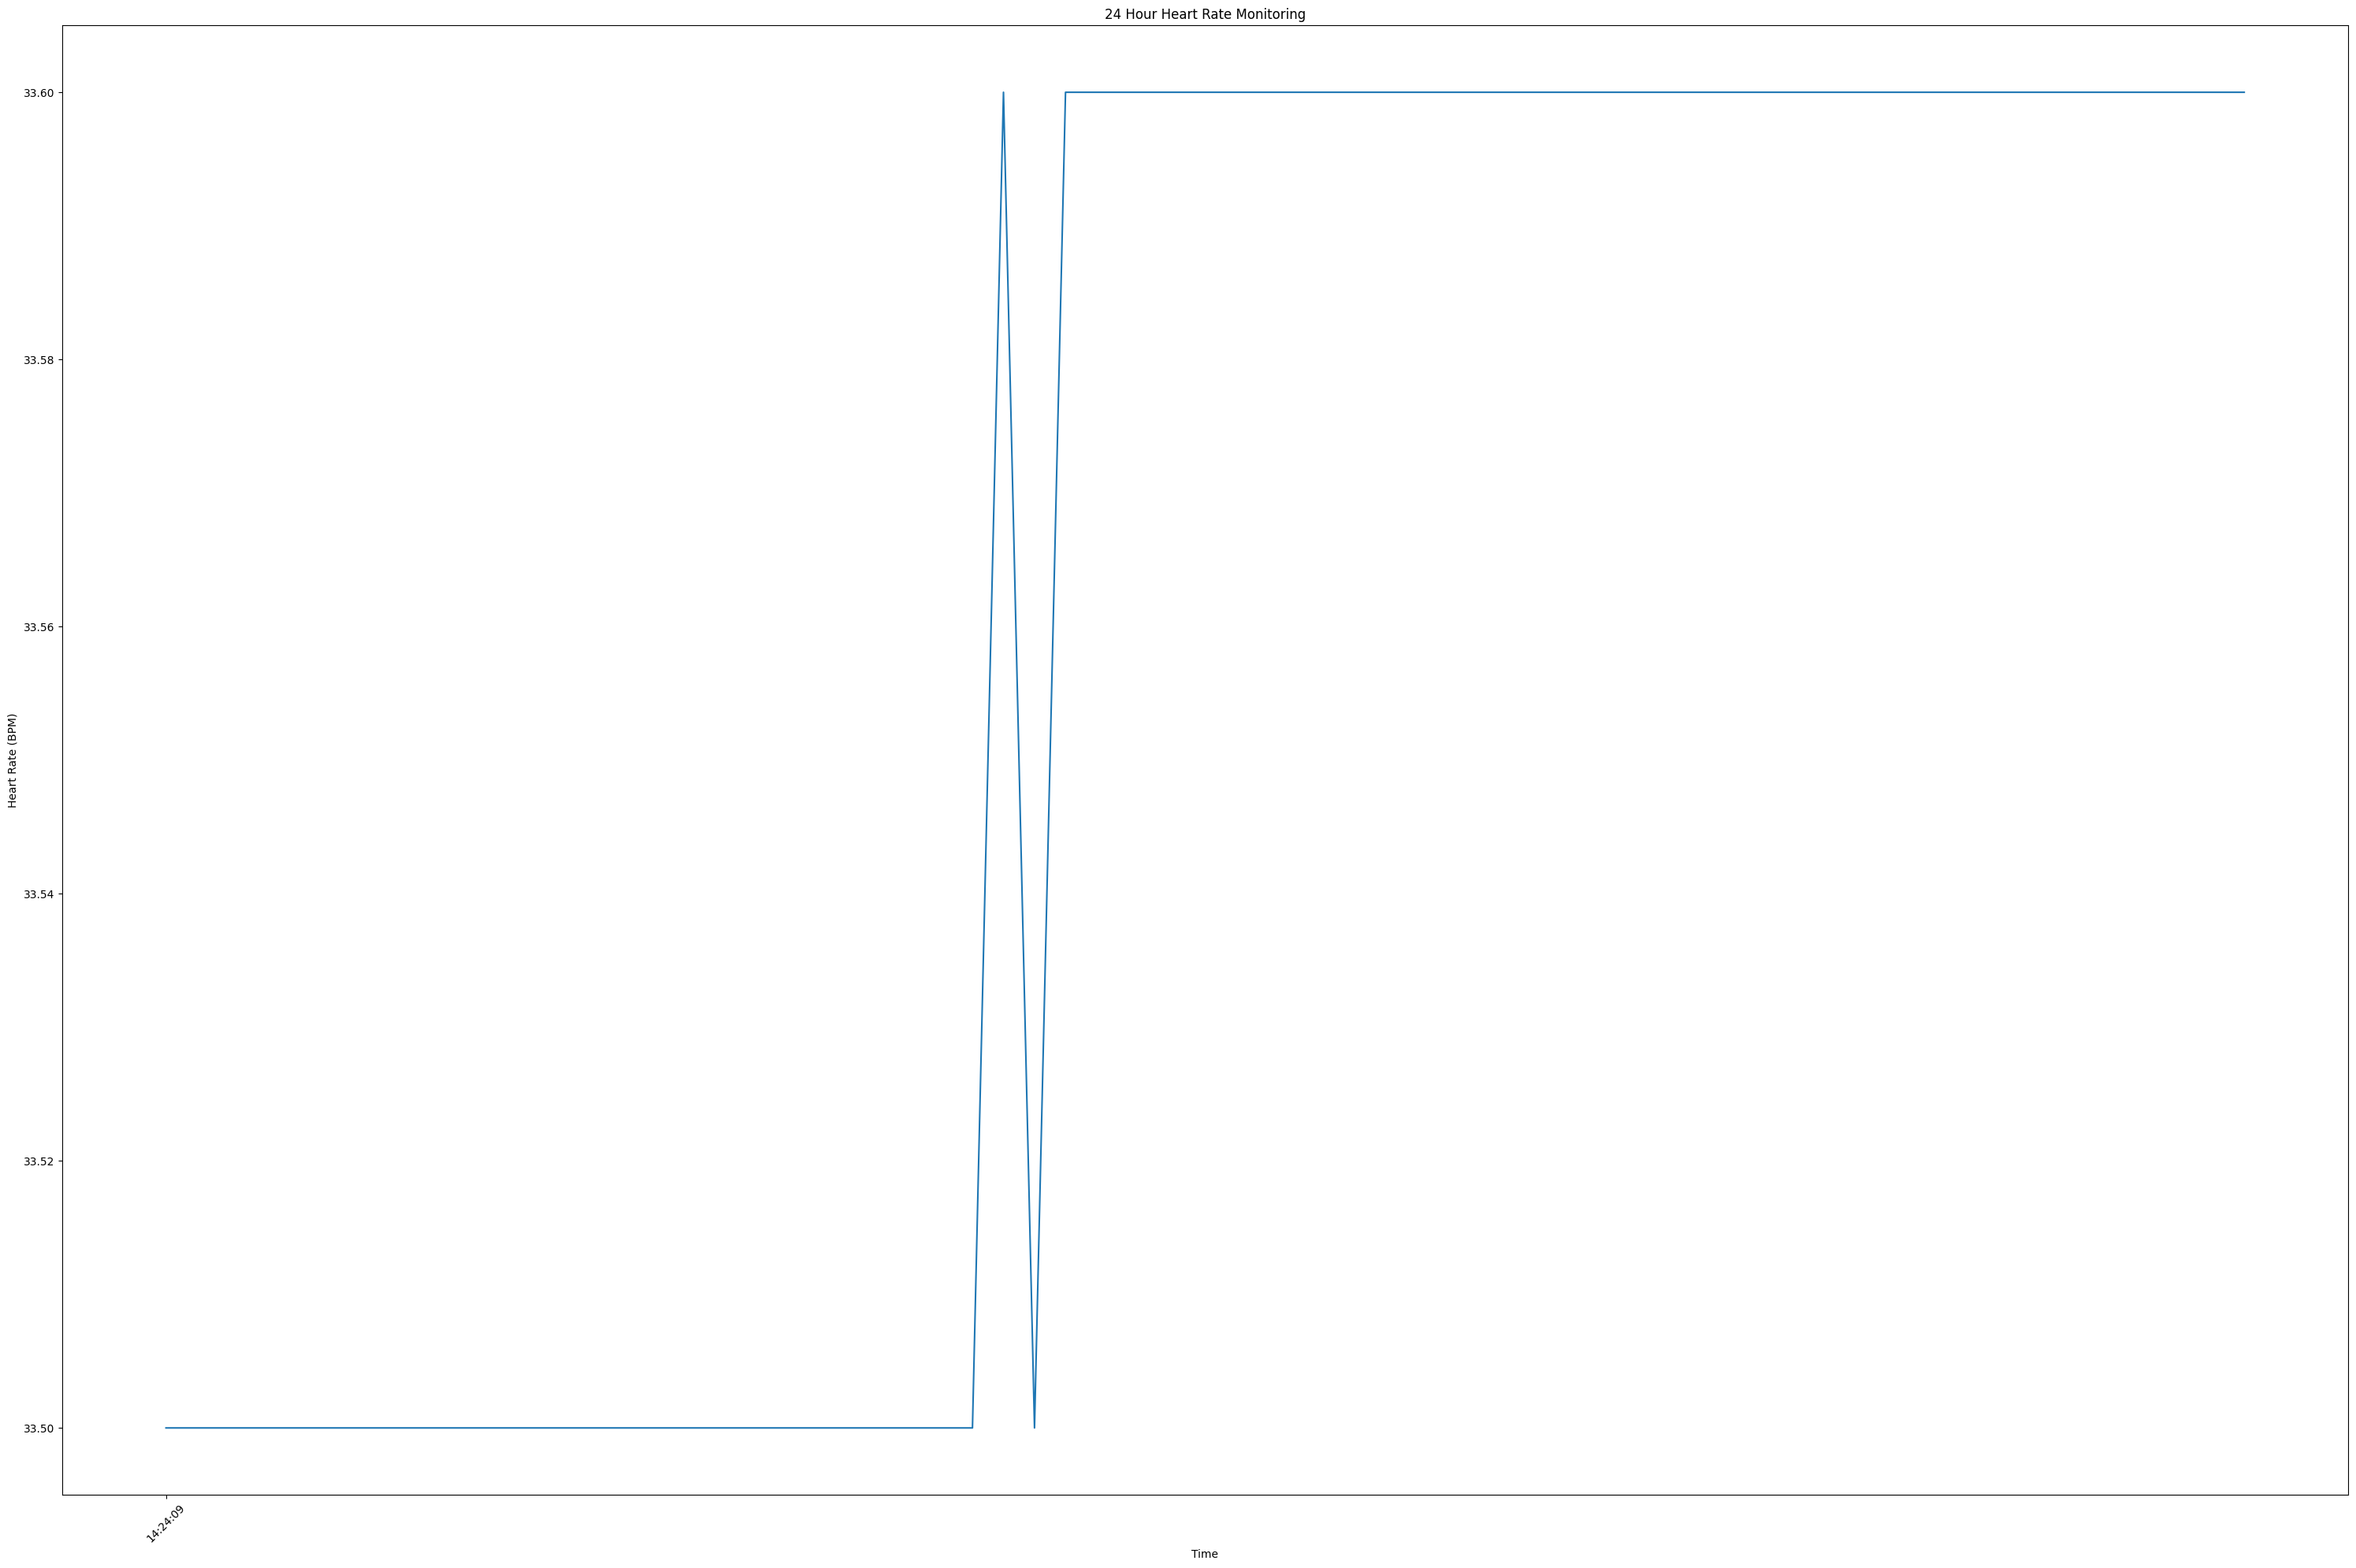

In [84]:
xaxis = [datetime.datetime.utcfromtimestamp(x/1000).strftime('%H:%M:%S') for x in np.array(heart_rate_data)[:,1]]
yaxis = np.array(heart_rate_data)[:,0]

plt.figure(figsize=(30, 20))
plt.plot(xaxis, yaxis) 
#sns.lineplot(y = yaxis, x = xaxis,markers=True)

plt.title('24 Hour Heart Rate Monitoring')
plt.xlabel('Time')
plt.ylabel('Heart Rate (BPM)')
plt.xticks(np.array(xaxis)[:: int(len(xaxis) / 1)])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
# plt.savefig('heart_rate_24hr.png')


## Radial Plot

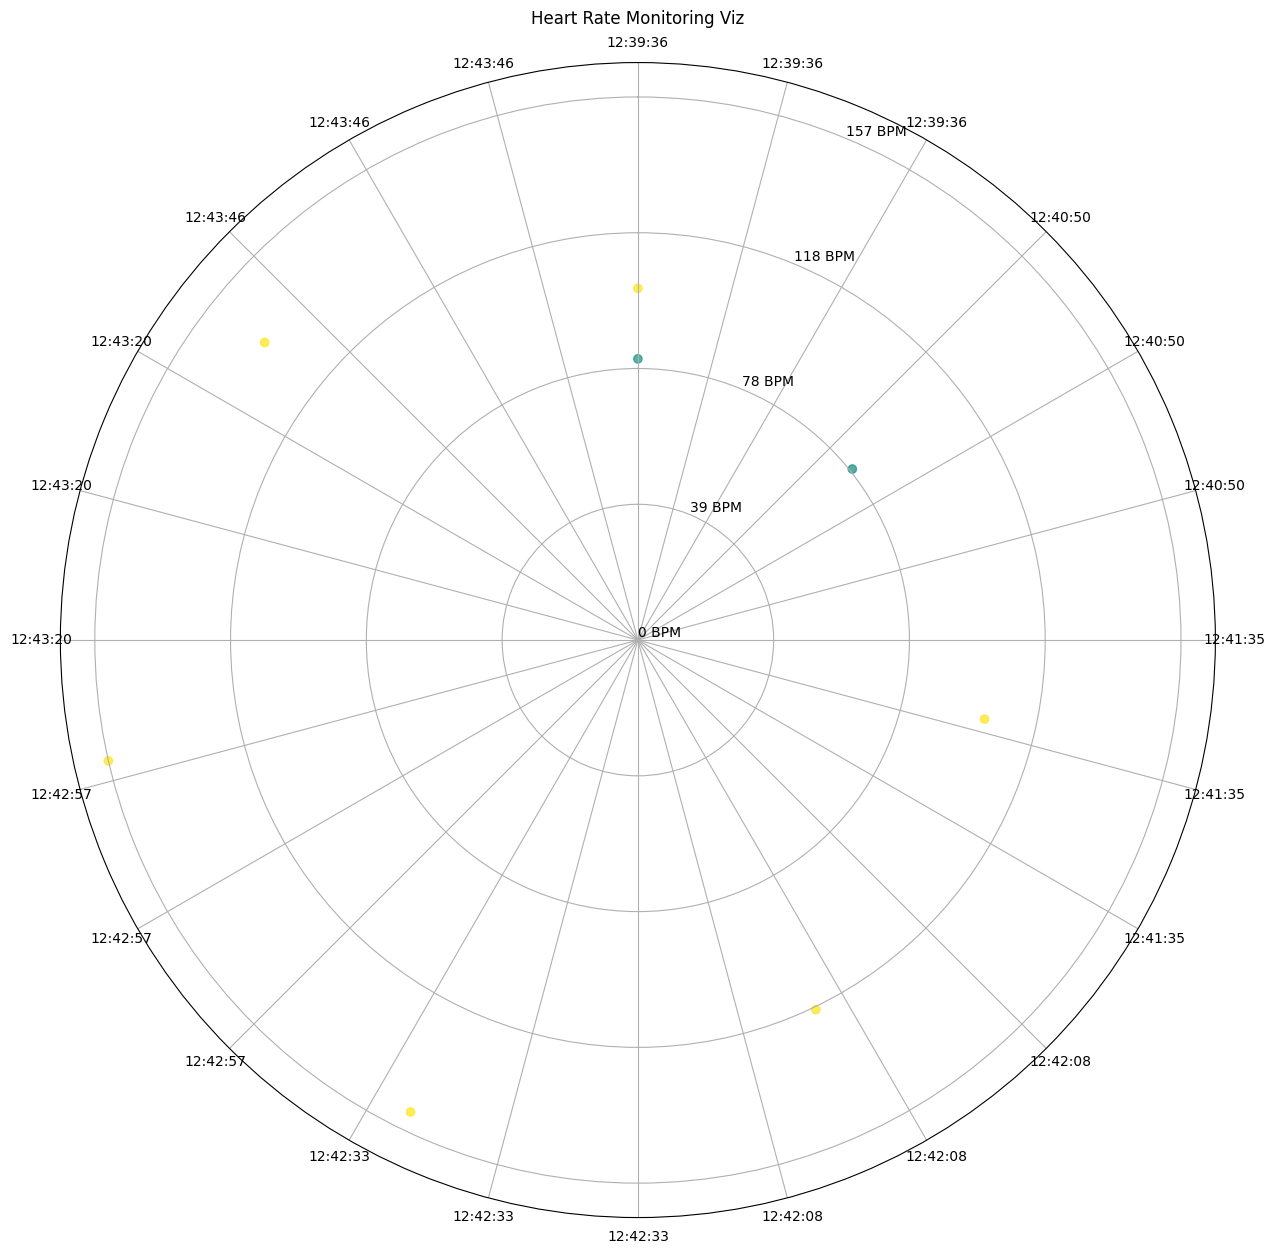

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

timestamps = [datetime.datetime.fromtimestamp(x/1000).strftime("%H:%M:%S") for x in np.array(heart_rate_data)[:,1]]
heart_rates = np.array(heart_rate_data)[:,0]


#----------------------------------------------------------------

figure, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(15, 15))

angles = np.linspace(0, 2*np.pi, len(heart_rates))
        
norm = plt.Normalize(60, 100)
colors = plt.cm.viridis(norm(heart_rates))

ax.scatter(angles, heart_rates, c=colors, alpha=0.75)

ax.set_theta_zero_location('N')  
ax.set_theta_direction(-1)  

ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(np.array(timestamps)[np.linspace(0, len(timestamps), 24, endpoint=False).astype('int')])

ax.set_ylim(0, max(heart_rates) + 10)
ax.set_yticks(np.linspace(0, max(heart_rates), 5))
ax.set_yticklabels([f"{int(i)} BPM" for i in np.linspace(0, max(heart_rates), 5)])
ax.set_title('Heart Rate Monitoring Viz', va='bottom')
ax.grid(True)

## Interactive Visualization

In [18]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=timestamps, y=heart_rates, mode='lines+markers',
                         hoverinfo='y', marker=dict(size=5),
                         line=dict(width=1)))


fig.update_layout(
    title='24-hour Heart Rate Timeline',
    xaxis_title='Time',
    yaxis_title='Heart Rate (bpm)',
    hovermode='x',
    xaxis=dict(
        rangeslider=dict(
            visible=True,
            thickness=0.1
        ),
        type='category'
    ),
    yaxis=dict(
        fixedrange=False
    )
)

fig.show()
